Accuracy: 0.92

Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.87      0.87      0.87        23
           2       0.87      0.87      0.87        23

    accuracy                           0.92        75
   macro avg       0.91      0.91      0.91        75
weighted avg       0.92      0.92      0.92        75

Matriz de confusión:
 [[29  0  0]
 [ 0 20  3]
 [ 0  3 20]]


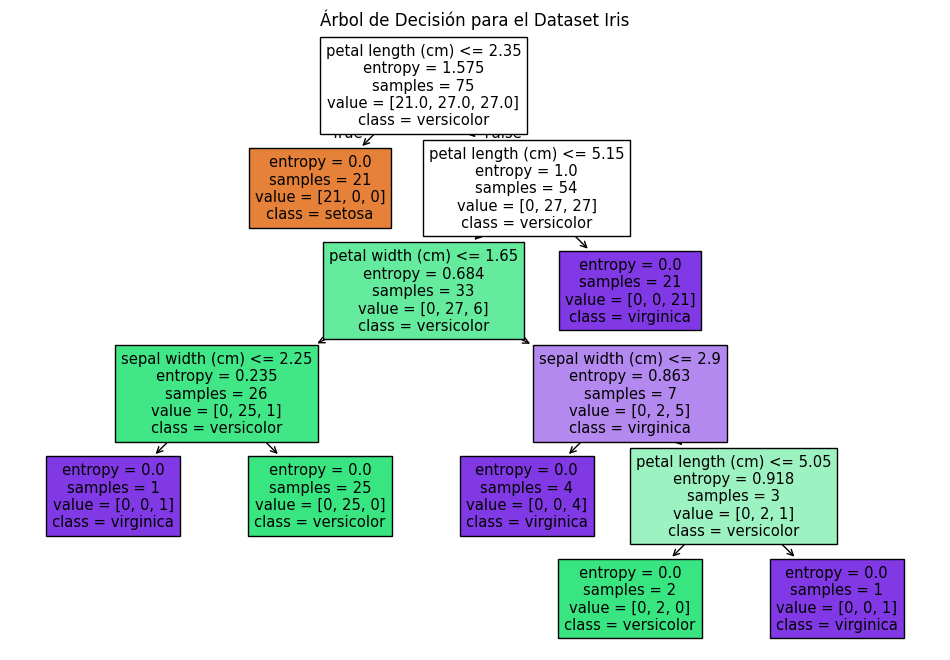

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

# 1. Cargar el dataset
iris = load_iris()
X = iris.data
y = iris.target

# 2. Dividir en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# 3. Crear y entrenar el modelo de árbol de decisión
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

# 4. Realizar predicciones
y_pred = clf.predict(X_test)

# 5. Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))

# 6. Visualizar el árbol
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Árbol de Decisión para el Dataset Iris")
plt.show()


CURVA ROC

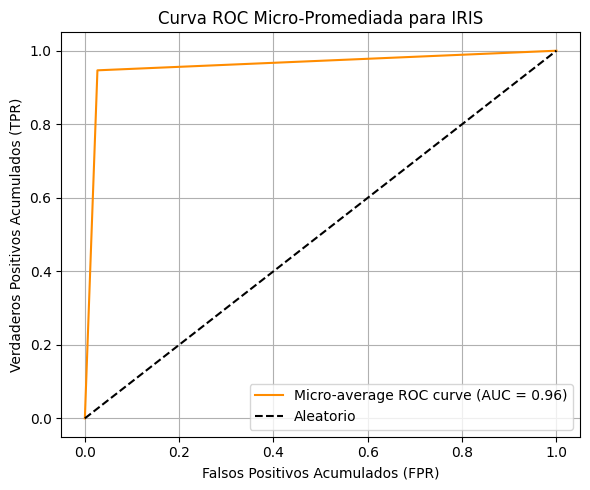

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

# Cargar y preparar datos
iris = load_iris()
X = iris.data
y = iris.target
y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.5, random_state=42)

# Clasificador One-vs-Rest
classifier = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# Curva ROC micro-promediada
fpr_micro, tpr_micro, _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Graficar
plt.figure(figsize=(6, 5))
plt.plot(fpr_micro, tpr_micro, label=f'Micro-average ROC curve (AUC = {roc_auc_micro:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlabel('Falsos Positivos Acumulados (FPR)')
plt.ylabel('Verdaderos Positivos Acumulados (TPR)')
plt.title('Curva ROC Micro-Promediada para IRIS')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
